In [2]:
import numpy as np
import pandas as pd

In [16]:
n_cols = 16
n_rows = 12
grid_shape = (n_cols, n_rows)

r1_tup = (12, 5)
r1_lin = n_rows * r1_tup[0] + r1_tup[1]
print('r1_lin: ', r1_lin)
r1_tup = (5, 12)
r2_lin = 17



r1_lin:  149


In [18]:
np.unravel_index(r1_lin, grid_shape, order='C')

(12, 5)

In [3]:
n_horizontal, n_vertical, n_frames = 3, 2, 4
shape = n_horizontal, n_vertical, n_frames
n_values = n_horizontal * n_vertical * n_frames
signals_arr = np.arange(start=0, stop=n_values)

In [6]:
signals_arr = signals_arr.reshape(shape)

In [19]:
flattened = signals_arr.reshape((n_horizontal * n_vertical, n_frames), order='C')

In [20]:
flattened

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [21]:
class ROI:
    width = None
    height = None
    
    def __init__(self, x_idx, y_idx):
        self.x_idx = x_idx
        self.y_idx = y_idx

In [23]:
ROI.width = 5

In [24]:
ROI.width

5

In [1]:
from src.B_generate_rois.generate_rois_from_size import generate_rois_from_size
from src.utils.coordinate_system import Dimensions
import src.analysis_options  


In [2]:

img_dims = Dimensions(2048, 1536)
rois = generate_rois_from_size(img_dims)

In [3]:
str(rois[0])

'(0; 0)'

In [4]:
rois[0]

<ROI(x:0, y:0) at 0x107041a50>

In [5]:
import numpy as np
import tifffile

# Create a sample 3D array
data = np.random.rand(10, 512, 512)  # 10 frames of 512x512 pixels each

# Save the array with specified dimensions
tifffile.imwrite('output.tif', data, shape=(0, 1, 2))  # Frames, Rows, Columns

# Load the array with specified dimensions
loaded_data = tifffile.imread('output.tif', shape=(0, 1, 2))  # Frames, Rows, Columns


ValueError: shape argument (0, 1, 2) does not match data shape (10, 512, 512)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

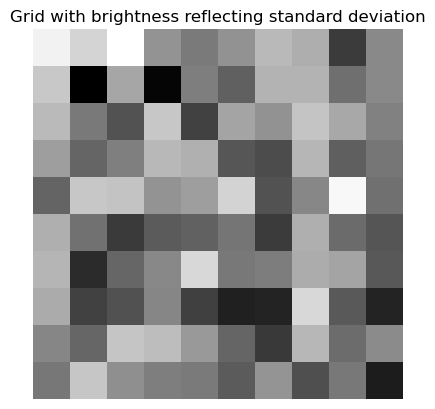

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate random standard deviations for each grid element
grid_size = 10  # Change this to your desired grid size
standard_deviations = np.random.randn(grid_size, grid_size)  # Using randn for unbounded values

# Map standard deviations to the range [0, 1]
min_std_dev = standard_deviations.min()
max_std_dev = standard_deviations.max()
normalized_std_dev = (standard_deviations - min_std_dev) / (max_std_dev - min_std_dev)

# Create grid
grid = np.zeros((grid_size, grid_size, 3))  # Initialize grid with zeros for RGB values

# Assign brightness based on normalized standard deviation
for i in range(grid_size):
    for j in range(grid_size):
        brightness = normalized_std_dev[i, j]
        grid[i, j] = [brightness, brightness, brightness]  # Assign same brightness to R, G, and B channels

# Display the grid
plt.imshow(grid)
plt.axis('off')
plt.title('Grid with brightness reflecting standard deviation')

# Create a colorbar legend
norm = mcolors.Normalize(vmin=standard_deviations.min(), vmax=standard_deviations.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.gray, norm=norm)
sm.set_array([])  # dummy empty array
cbar = plt.colorbar(sm)
cbar.set_label('Standard Deviation')

plt.show()



In [2]:
grid

array([[[0.07599774, 0.07599774, 0.07599774],
        [0.68621832, 0.68621832, 0.68621832],
        [0.03318754, 0.03318754, 0.03318754],
        [0.33009415, 0.33009415, 0.33009415],
        [0.41144153, 0.41144153, 0.41144153],
        [0.42881059, 0.42881059, 0.42881059],
        [0.05195549, 0.05195549, 0.05195549],
        [0.28608458, 0.28608458, 0.28608458],
        [0.19181401, 0.19181401, 0.19181401],
        [0.55384139, 0.55384139, 0.55384139]],

       [[0.94478657, 0.94478657, 0.94478657],
        [0.15946546, 0.15946546, 0.15946546],
        [0.17164335, 0.17164335, 0.17164335],
        [0.15370997, 0.15370997, 0.15370997],
        [0.08227806, 0.08227806, 0.08227806],
        [0.28013962, 0.28013962, 0.28013962],
        [0.02315387, 0.02315387, 0.02315387],
        [0.20078647, 0.20078647, 0.20078647],
        [0.95669068, 0.95669068, 0.95669068],
        [0.55399204, 0.55399204, 0.55399204]],

       [[0.94126855, 0.94126855, 0.94126855],
        [0.65597071, 0.6559707

In [4]:
grid.shape

(10, 10, 3)

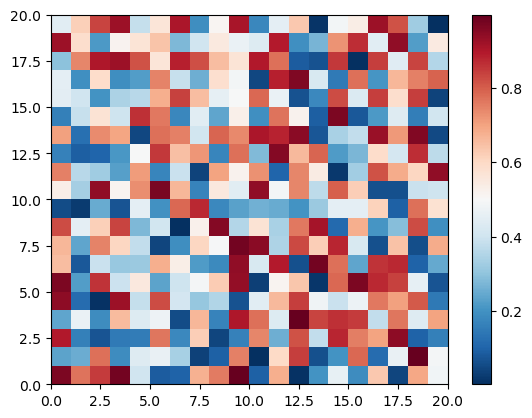

In [9]:
fig, ax = plt.subplots()
cmap = 'RdBu_r'

pcm = ax.pcolormesh(np.random.random((20, 20)), cmap=cmap)

# fig.colorbar(pcm, ax=ax, shrink=0.6)
fig.colorbar(pcm)

In [10]:
np.random.random((20, 20))

array([[0.17132319, 0.72270011, 0.29148894, 0.90261971, 0.86099152,
        0.49150668, 0.4384489 , 0.21174529, 0.81770964, 0.13532857,
        0.39756344, 0.53239809, 0.21212549, 0.2012099 , 0.72388239,
        0.18269111, 0.95656736, 0.1959251 , 0.50836631, 0.59562185],
       [0.35683695, 0.27303702, 0.43976385, 0.43525314, 0.84409825,
        0.24365706, 0.82457746, 0.28947306, 0.88410598, 0.2576015 ,
        0.62419387, 0.7520921 , 0.77549888, 0.54241723, 0.94394496,
        0.75834416, 0.42449347, 0.79902498, 0.7518184 , 0.40742063],
       [0.39861846, 0.44140479, 0.92913608, 0.03519999, 0.19845117,
        0.49075734, 0.82678097, 0.63189759, 0.61073674, 0.32376009,
        0.10160892, 0.9901627 , 0.50847606, 0.1031542 , 0.33370006,
        0.37960175, 0.21484137, 0.32783318, 0.36844715, 0.26876421],
       [0.14041479, 0.81299736, 0.21744061, 0.60766936, 0.46333503,
        0.02928044, 0.67184584, 0.97383001, 0.11367601, 0.54894603,
        0.19466715, 0.44077973, 0.2978149 , 0

In [12]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [13]:
cmap = plt.colormaps['viridis']

In [21]:
cmap(0)

(0.267004, 0.004874, 0.329415, 1.0)

In [32]:
width, height, n_frames = 2, 3, 4
arr = np.random.random(size=(width, height, n_frames))

In [33]:
arr

array([[[1.17955604e-02, 1.50452360e-02, 2.74989969e-01, 6.88138300e-01],
        [9.67473110e-01, 9.89035504e-01, 2.84743204e-01, 2.37171100e-01],
        [4.49201475e-01, 1.19731302e-01, 9.33689028e-04, 7.64950353e-01]],

       [[9.95574570e-02, 9.30817986e-01, 8.08866585e-01, 3.87246084e-01],
        [5.86725711e-01, 6.35573598e-01, 2.41164145e-01, 8.56656473e-01],
        [5.70842632e-01, 1.75254494e-02, 5.95219403e-01, 4.63741830e-01]]])

In [35]:
arr.std(axis=2)

array([[0.27591195, 0.35912367, 0.2982589 ],
       [0.33213181, 0.22050068, 0.23296331]])